In [63]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
rng = np.random
%matplotlib inline 
from sklearn import preprocessing

In [3]:
dados = pd.read_csv('cs-training.csv')

In [6]:
X_train, X_test, y_train, y_test = train_test_split(dados.iloc[:,1:12], dados['SeriousDlqin2yrs'], test_size=0.33, random_state=42)

In [12]:
print(X_test.isnull().sum())
semNA = X_test.dropna()

SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                        0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                           9894
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      1298
dtype: int64


In [15]:
print(X_test.shape)
print(semNA.shape)
print(semNA.isnull().sum())

(49500, 11)
(39606, 11)
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64


In [37]:
previsores = semNA.columns[semNA.columns != 'MonthlyIncome']
target = 'MonthlyIncome'

In [23]:
import tensorflow as tf

def input_fn(df, previsores, target):
  # Creates a dictionary mapping from each continuous feature column name (k) to
  # the values of that column stored in a constant Tensor.
  continuous_cols = {k: tf.constant(df[k].values)
                     for k in previsores}
  # Creates a dictionary mapping from each categorical feature column name (k)
  # Converts the label column into a constant Tensor.
  label = tf.constant(df[target].values)
  # Returns the feature columns and the label.
  return feature_cols, label

In [34]:
n_samples = semNA.shape[0]

In [44]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

In [67]:
sess = tf.Session()
sess.run(init)

X1 = preprocessing.scale(semNA['age'].values)
Y1 = preprocessing.scale(semNA[target])

In [ ]:
for i in range(10000):
    sess.run(optimizer, feed_dict={X: X1, Y: Y1})
    if i % display_step == 0:
        c = sess.run(cost, feed_dict={X: X1, Y: Y1})
        print "cost=", "{:.9f}".format(c), "W=", sess.run(W), "b=", sess.run(b)
print "cost=", "{:.9f}".format(c), "W=", sess.run(W), "b=", sess.run(b)

cost= 1.234430194 W= -1.1557 b= -0.266578
cost= 0.768593609 W= -0.688585 b= -0.161281
cost= 0.598085523 W= -0.405977 b= -0.0975761
cost= 0.535672665 W= -0.234998 b= -0.0590341
cost= 0.512828112 W= -0.131554 b= -0.035716
cost= 0.504466236 W= -0.06897 b= -0.0216084
cost= 0.501404941 W= -0.0311063 b= -0.0130732
cost= 0.500285208 W= -0.00819854 b= -0.00790938
cost= 0.499875098 W= 0.0056608 b= -0.00478522
cost= 0.499724984 W= 0.0140458 b= -0.00289509
cost= 0.499669731 W= 0.0191188 b= -0.00175155
cost= 0.499650121 W= 0.0221879 b= -0.0010597
cost= 0.499642313 W= 0.0240448 b= -0.000641126
cost= 0.499640107 W= 0.0251682 b= -0.000387885
cost= 0.499638975 W= 0.0258479 b= -0.000234672
cost= 0.499638885 W= 0.0262591 b= -0.000141979
cost= 0.499638468 W= 0.0265079 b= -8.58999e-05
cost= 0.499637991 W= 0.0266584 b= -5.19738e-05
cost= 0.499638319 W= 0.0267495 b= -3.14459e-05
cost= 0.499638140 W= 0.0268046 b= -1.90237e-05
cost= 0.499638230 W= 0.0268379 b= -1.15071e-05
cost= 0.499638170 W= 0.0268581 b= -6

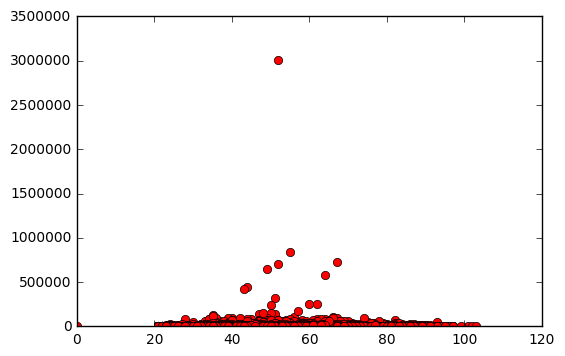

In [59]:
plt.plot(semNA['age'], semNA[target],  'ro')
plt.show()